In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [3]:
#importing dataset
train = pd.read_excel(r'C:/Users/30016142/Model_File_Unit-7_June_2018.xlsx')

In [4]:
train.head(3)

,Date,Load_Variation_in_last_2H,Both Top Mill Running,Both Bottam Mill Running,Mill Outlet temp>60 Deg,SH_Spray-Stage1,SH_Spray-Stage2,Rh Dmaper Position>70,Sootblowing status,Excess Air,...,ASH,VM,FC,GCV,C %,H %,Majority Coal,Majority Coal%,MS Temp>565,MS Temp L-R diff
0,2018-06-01 00:00:00,0.000000,1,0,1,40.455588,20.618411,0,0,17.957718,...,4.68,29.42,30.01,4151.0,44.578221,2.797983,SPL,65.0,1,2.428762
1,2018-06-01 02:00:00,0.122589,1,0,1,28.095442,20.494443,0,1,17.752039,...,4.68,29.42,30.01,4151.0,44.578221,2.797983,SPL,65.0,1,2.723401
2,2018-06-01 04:00:00,0.287331,1,0,1,48.931669,19.788192,0,0,17.815545,...,4.68,29.42,30.01,4151.0,44.578221,2.797983,SPL,65.0,1,0.083295


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2936 non-null   datetime64[ns]
 1   Load_Variation_in_last_2H  2936 non-null   float64       
 2   Both Top Mill Running      2936 non-null   int64         
 3   Both Bottam Mill Running   2936 non-null   int64         
 4   Mill Outlet temp>60 Deg    2936 non-null   int64         
 5   SH_Spray-Stage1            2936 non-null   float64       
 6   SH_Spray-Stage2            2936 non-null   float64       
 7   Rh Dmaper Position>70      2936 non-null   int64         
 8   Sootblowing status         2936 non-null   int64         
 9   Excess Air                 2936 non-null   float64       
 10  Excess Air>25              2936 non-null   int64         
 11  LTRH Outlet FG L-R gap     2936 non-null   float64       
 12  Eco Ou

<AxesSubplot:xlabel='MS Temp>565', ylabel='count'>

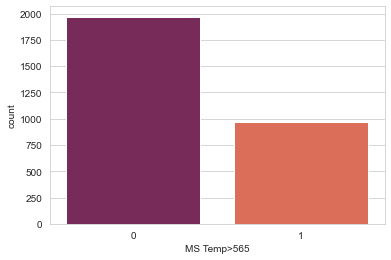

In [7]:
#understanding the class distribution
sns.set_style('whitegrid')
sns.countplot(x='MS Temp>565',data=train,palette='rocket')

In [9]:
#Profilling report
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file("June_2018.html")

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#getting dummy values for coal type
train = pd.get_dummies(train)

In [11]:
train

,Load_Variation_in_last_2H,Both Top Mill Running,Both Bottam Mill Running,Mill Outlet temp>60 Deg,SH_Spray-Stage1,SH_Spray-Stage2,Rh Dmaper Position>70,Sootblowing status,Excess Air,Excess Air>25,...,H %,Majority Coal%,MS Temp>565,MS Temp L-R diff,Majority Coal_AUS,Majority Coal_BNY,Majority Coal_GAR,Majority Coal_MEL,Majority Coal_OPN,Majority Coal_SPL
0,0.000000,1,0,1,40.455588,20.618411,0,0,17.957718,0,...,2.797983,65.0,1,2.428762,0,0,0,0,0,1
1,0.122589,1,0,1,28.095442,20.494443,0,1,17.752039,0,...,2.797983,65.0,1,2.723401,0,0,0,0,0,1
2,0.287331,1,0,1,48.931669,19.788192,0,0,17.815545,0,...,2.797983,65.0,1,0.083295,0,0,0,0,0,1
3,0.133430,1,0,1,34.905212,20.104811,0,0,17.361397,0,...,2.797983,65.0,1,0.262464,0,0,0,0,0,1
4,0.309362,1,0,1,28.392961,19.013922,0,0,17.453237,0,...,2.797983,65.0,1,0.759851,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,17.808893,0,0,1,6.983477,15.003534,0,0,27.760235,1,...,2.920064,60.0,1,1.862347,0,0,1,0,0,0
2932,8.971550,0,0,1,2.485269,11.932720,0,0,25.854198,1,...,2.920064,60.0,1,1.499001,0,0,1,0,0,0
2933,13.044568,0,0,1,2.543653,17.365111,0,0,29.522727,1,...,2.920064,60.0,1,1.858373,0,0,1,0,0,0
2934,48.470609,0,0,1,1.029890,10.684261,0,0,17.439632,0,...,2.920064,60.0,0,0.339933,0,0,1,0,0,0


In [12]:
train.fillna(0, inplace=True)

In [13]:
# Spliting data for training the model. for Train test purpose
from sklearn.model_selection import train_test_split as tts
X = train.drop('MS Temp>565', axis = 1)
y = train['MS Temp>565']
X_train, X_test, Y_train, Y_test = tts(X, y, test_size=0.40,random_state=42)

In [14]:
#Modelling

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_predtrain = dt.predict(X_train)
y_pred= dt.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print("total Observation",len(X_test))
print("Accuracy on Train data:",accuracy_score(Y_train,Y_predtrain))
print("Accuracy on Test data:",accuracy_score(Y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred))   

total Observation 1175
Accuracy on Train data: 1.0
Accuracy on Test data: 0.7531914893617021
Confusion Matrix: [[626 159]
 [131 259]]


In [16]:
#Finding the most important features
dt.feature_importances_

array([0.06422075, 0.00814112, 0.        , 0.        , 0.06333816,
       0.13809976, 0.01439823, 0.00483749, 0.05296686, 0.00907959,
       0.0469573 , 0.06757884, 0.00703211, 0.02599222, 0.02895454,
       0.01397602, 0.01234379, 0.03948236, 0.04005611, 0.01694138,
       0.33213848, 0.        , 0.00204527, 0.00421018, 0.00548946,
       0.        , 0.00172   ])

Text(0.5, 0, 'Decision Tree Feature Importance')

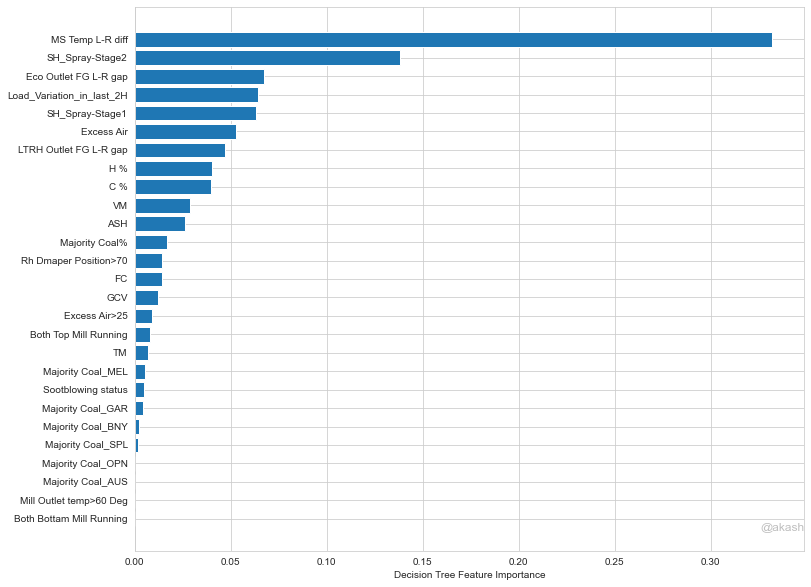

In [17]:
#visulizing feature importance

fig, ax = plt.subplots(figsize=(12,10))
fig.text(0.9, 0.15, '@akash', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [23]:
ip = list(zip(dt.feature_importances_,X_train.columns.values))
op = pd.DataFrame(ip,columns=["Importance_2018","Feature_Name_2018"])

In [25]:
op.to_excel("feature_2018.xlsx")